**IMPORTING REQUIRED LIBRARIES!**

In [1105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**IMPORTING DATASET**

In [1106]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**DATATYPES OF VARIABLES**

In [1107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**NUMERICAL STATS OF VARIABLES**

In [1108]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**SHAPE OF DATASET**

In [1109]:
df.shape

(7109, 22)

INFORMATION REGARDING ABOVE CODE:

Dataset contains #7109 rows and #22 Columns

**FINDING NULL VALUES ON EACH VARIABLES**

In [1110]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

INFORMATION REGARDING ABOVE CODE:

*   Here we found that,
"QS_OVERALL","N_BATHROOM","N_BEDROOM" variables having null 
values in thier columns.
*   Some columns are in object type need to convert to numeric




#**CLEANING DATASET**
*Replacing the null values with mode of respective* 

In [1111]:
df["QS_OVERALL"].fillna(df["QS_OVERALL"].mode()[0],inplace=True)
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0],inplace=True)
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0],inplace=True)

In [1112]:
#checking total null values after replacing.
df.isnull().sum().sum()

0

*CORRECTING DATATYPES*

In [1113]:
#N-BEDROOM, N_BATHROOM
df=df.astype({"N_BEDROOM":int,"N_BATHROOM":int})

*summary:*
Above variables are in float datatype 
Rooms count can't be in floating points
lets convert into integer for convenient 

In [1114]:
#DATE_SALE & DATE_BUILD
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year
#Getting age of buildings from the Date of Build & Date of Sale!
df["AGE_OF_BUILDING"]=df['SALE_YEAR']-df['BUILD_YEAR']
df['TOTAL_PRICE'] = pd.DataFrame(df.REG_FEE	+ df.COMMIS	+ df.SALES_PRICE)

In [1115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PRT_ID           7109 non-null   object        
 1   AREA             7109 non-null   object        
 2   INT_SQFT         7109 non-null   int64         
 3   DATE_SALE        7109 non-null   datetime64[ns]
 4   DIST_MAINROAD    7109 non-null   int64         
 5   N_BEDROOM        7109 non-null   int64         
 6   N_BATHROOM       7109 non-null   int64         
 7   N_ROOM           7109 non-null   int64         
 8   SALE_COND        7109 non-null   object        
 9   PARK_FACIL       7109 non-null   object        
 10  DATE_BUILD       7109 non-null   datetime64[ns]
 11  BUILDTYPE        7109 non-null   object        
 12  UTILITY_AVAIL    7109 non-null   object        
 13  STREET           7109 non-null   object        
 14  MZZONE           7109 non-null   object 

In [1116]:
#checking duplicates
df.duplicated().sum()

0

**DROPPING UNNECESSARY COLUMNS:**

In [1117]:
df.drop(["PRT_ID","REG_FEE","DATE_SALE","DATE_BUILD","COMMIS","SALES_PRICE","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","QS_ROOMS"],axis=1,inplace=True)
'''columns with unique values will have less effect on prediction so we drop it down!
we have found Age of building from Date_sale and Date_build so we can drop those and also we can drop masked features'''

'columns with unique values will have less effect on prediction so we drop it down!\nwe have found Age of building from Date_sale and Date_build so we can drop those and also we can drop masked features'

**CORRECTING SPELLINGS**

In [1118]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

INFORMATION REGARDING ABOVE CODE:Same areas were found as different because of wrong spelling



In [1119]:
#AREA
'''we gonna use dictionary , by placing improper name as key ,
wherever it found that wrong spelled word replace with correct name.'''
correct_names={"Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","Adyr":"Adyar","Chrmpet":"Chrompet","Chrompt":"Chrompet","Chormpet":"Chrompet","Karapakam":"Karapakkam","KKNagar":"KK Nagar","TNagar":"T Nagar","Velchery":"Velachery"}
df["AREA"]=df["AREA"].replace(correct_names)

In [1120]:
#on_SALE_COND
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [1121]:
df=df.replace(to_replace=["Ab Normal"],value="AbNormal")
df=df.replace(to_replace=["Adj Land"],value="AdjLand")
df=df.replace(to_replace=["Partiall"],value="Partial")
df=df.replace(to_replace=["PartiaLl"],value="Partial")

In [1122]:
df["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [1123]:
df=df.replace(to_replace="Noo",value="No")

In [1124]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [1125]:
df=df.replace(to_replace="Comercial",value="Commercial")
df=df.replace(to_replace="Other",value="Others")

In [1126]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [1127]:
df=df.replace(to_replace="All Pub",value="AllPub")
df=df.replace(to_replace="NoSewr ",value="NoSewr")

In [1128]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [1129]:
df=df.replace(to_replace="NoAccess",value="No Access")
df=df.replace(to_replace="Pavd",value="Paved")

In [1130]:
#now we cleaned our dataset for convenient
# saving the cleaned data in CSV format
df.to_csv("cleaned_chennai_house_sales")

In [1131]:
categorical_features = [x for x in df.columns if df[x].dtype =="object"]
print("Categorical:",categorical_features)
numerical_features=[x for x in df.columns if df[x].dtype!="object"]
print("Numerical:",numerical_features)

Categorical: ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']
Numerical: ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'BUILD_YEAR', 'SALE_YEAR', 'AGE_OF_BUILDING', 'TOTAL_PRICE']


#**EXPLORATORY DATA ANALYSIS**

CATEGORICAL FEATURES:

In [1132]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features=df[categorical_features]
for feature in categorical_features:
  print('The feature {} with calssifications are- {}'.format(feature,(df[feature].unique())))

The feature AREA with calssifications are- ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
The feature SALE_COND with calssifications are- ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
The feature PARK_FACIL with calssifications are- ['Yes' 'No']
The feature BUILDTYPE with calssifications are- ['Commercial' 'Others' 'House']
The feature UTILITY_AVAIL with calssifications are- ['AllPub' 'ELO' 'NoSewr' 'NoSeWa']
The feature STREET with calssifications are- ['Paved' 'Gravel' 'No Access']
The feature MZZONE with calssifications are- ['A' 'RH' 'RL' 'I' 'C' 'RM']


In [1133]:
# on_AREA
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

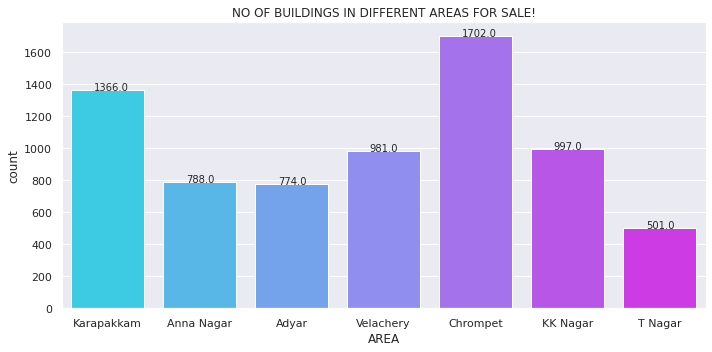

In [1134]:
#AREA!
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 11
ax=sns.countplot(x="AREA",data=df,palette="cool")
ax.set_title("NO OF BUILDINGS IN DIFFERENT AREAS FOR SALE!")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

SUMMARY:
Chrompet,Karapakkam,KK Nagar are the top 3 areas with buildings for sale

In [1135]:
# BEDROOMS AND BATHROOMS
print(df["N_BEDROOM"].value_counts())
print(df["N_BATHROOM"].value_counts())

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64
1    5594
2    1515
Name: N_BATHROOM, dtype: int64


*SUMMARY:*
1.   buildings with  #1 bedroom & #1 bathroom were more 
2.   buildings having atlesast #3 bedrooms having atleast # 2 bathrooms

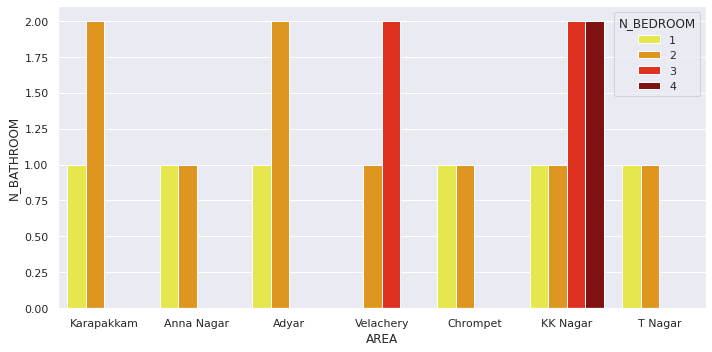

In [1136]:
# df.groupby("N_BEDROOM")["N_BATHROOM"].value_counts().plot(kind="barh")
ax=sns.barplot(x=df["AREA"],hue=df["N_BEDROOM"],y=df["N_BATHROOM"],palette="hot_r",data=df,ci=None,)
plt.show()

*summary:*

1.   Anna Nagar, Chrompet,T Nagar has no buildings having more than one bathroom
1.   Velachery and KK nagar having buildings with # bed rooms
1.   KK Nagar is only having #4 bedroom buildings











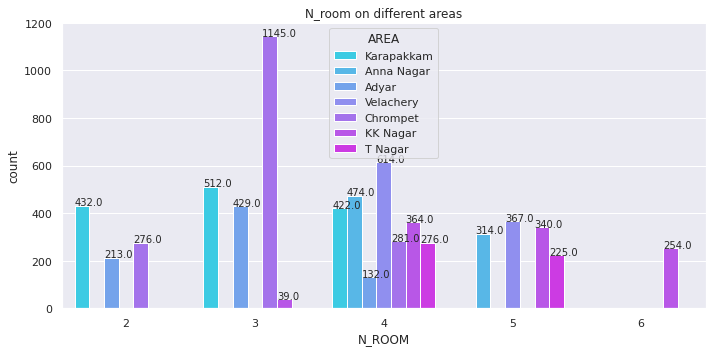

In [1137]:
#N_ROOM
ax=sns.countplot(x="N_ROOM",data=df,palette="cool",hue="AREA")
ax.set_title("N_room on different areas")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

*Summary:*
1.   Chrompet have sold more buildings having #3 rooms.
2.   KK Nagar is the only area have sold buildings with #6 rooms
1.   Anna Nagar and Velachery have sold buildings with # 4 rooms 



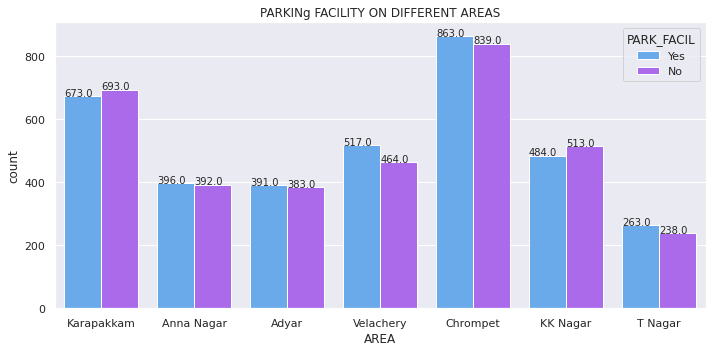

In [1138]:
#PARK_FACIL
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.autolayout"] = True
ax=sns.countplot(x="AREA",data=df,hue="PARK_FACIL",palette="cool")
ax.set_xticklabels(ax.get_xticklabels(), ha="right",horizontalalignment='center')
ax.set_title("PARKINg FACILITY ON DIFFERENT AREAS")
plt.tight_layout()
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show() 

*summary:*
Allmost all the areas having 50% of the buildings without parking facility.

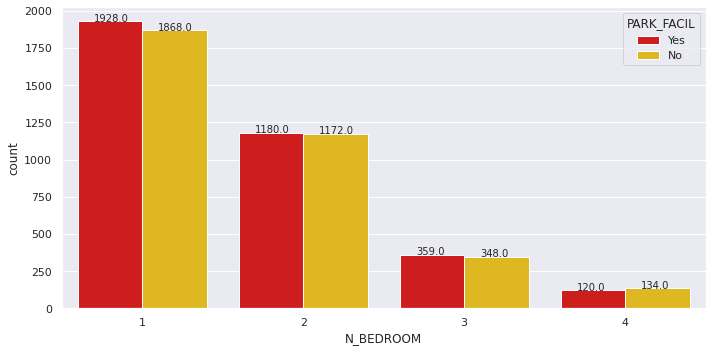

In [1139]:
ax=sns.countplot(x="N_BEDROOM",data=df,hue="PARK_FACIL",palette="hot")
ax.set_xticklabels(ax.get_xticklabels(), ha="right",horizontalalignment='center')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
plt.show()

*Summary:*
Buildings having "n" bedrooms almost having only 50% of parking facility. 

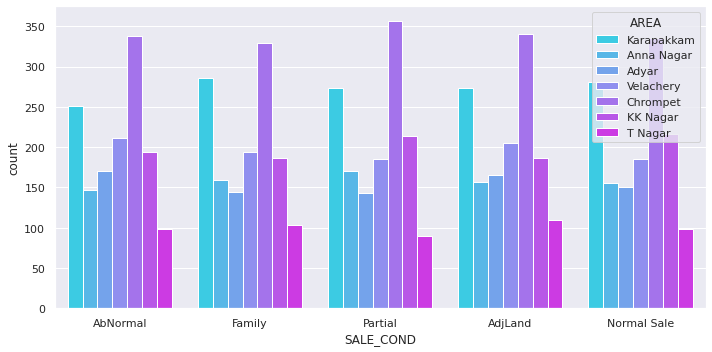

In [1140]:
#SALE_COND
sns.countplot(x=df["SALE_COND"],palette="cool",hue=df["AREA"])

*summary:*
1.   Different Building conditions were sold evenly on all the Areas. 




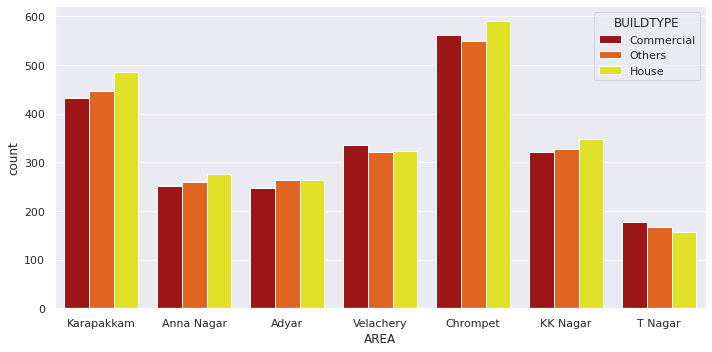

In [1141]:
#BUILD_TYPE:
sns.countplot(hue=df["BUILDTYPE"],x=df["AREA"],palette="hot")

*summary:*
1.   All area is having even range of buildtype with respect to thier total buildings.




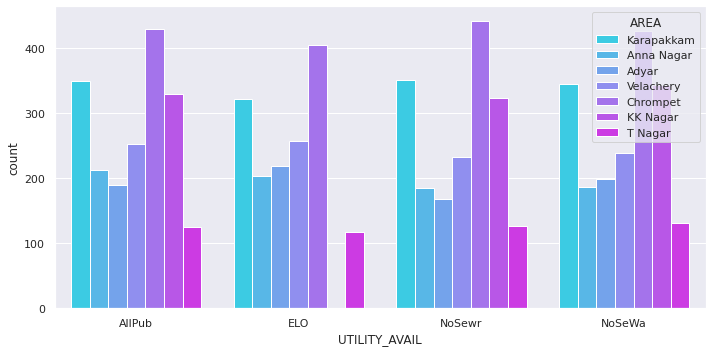

In [1142]:
#utility_avail
sns.countplot(x=df["UTILITY_AVAIL"],hue=df["AREA"],palette="cool")

*Summary:*
1.   KK Nagar is the only area having no "ELO".




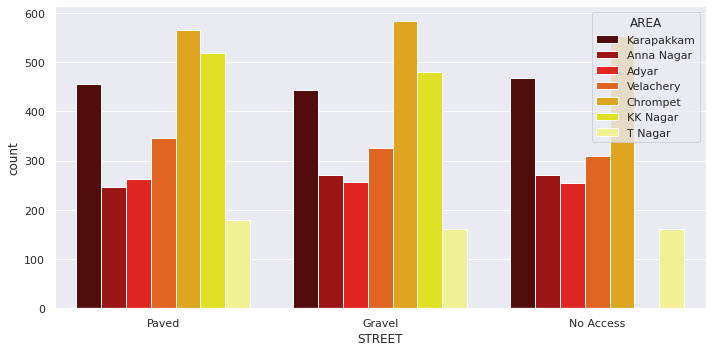

In [1143]:
sns.countplot(x=df["STREET"],hue=df["AREA"],palette="hot")

*Summary:*
1.   KK Nagar is the only city have sold the buildings with ACESSIBLE streets. 



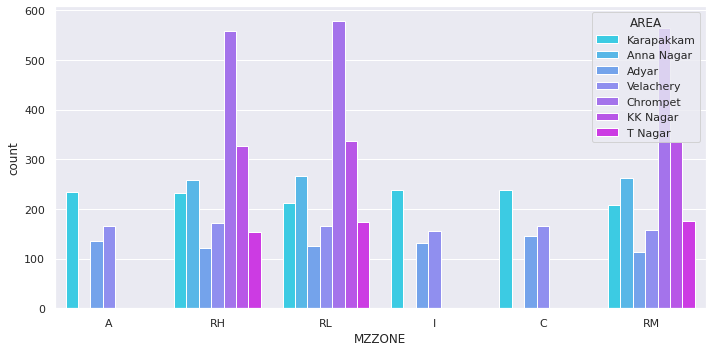

In [1144]:
#MZZONE
sns.countplot(x=df["MZZONE"],hue=df["AREA"],palette="cool")

*Summary:*
1.   Sold buildings from Anna Nagar,T Nagar,KK Nagar,Chrompet were not having A,I,C types of MZZONE 




CATEGORICAL FEATURES WITH TARGET "TOTAL_PRICE".

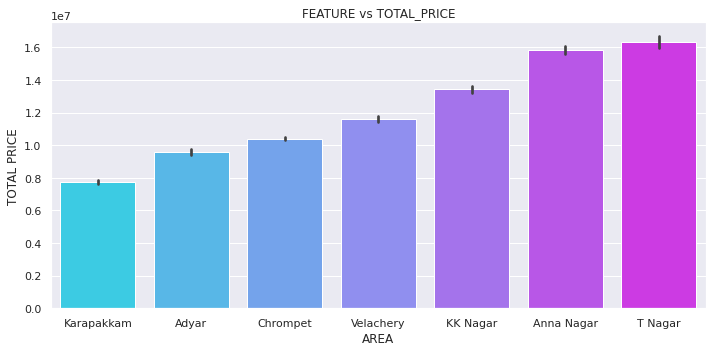

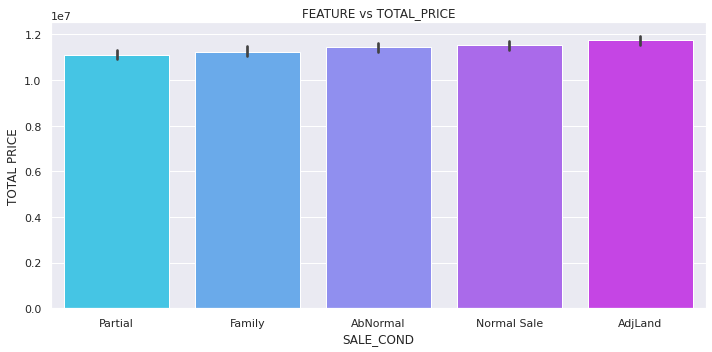

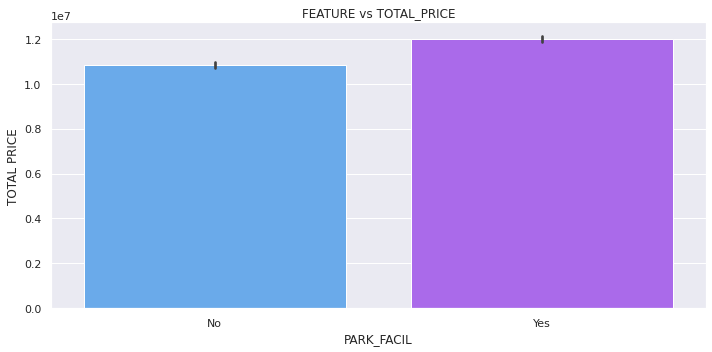

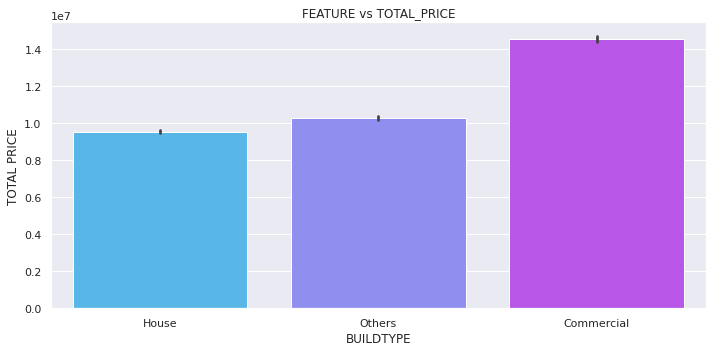

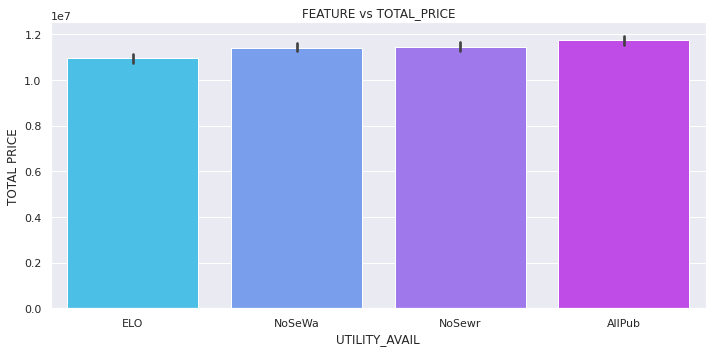

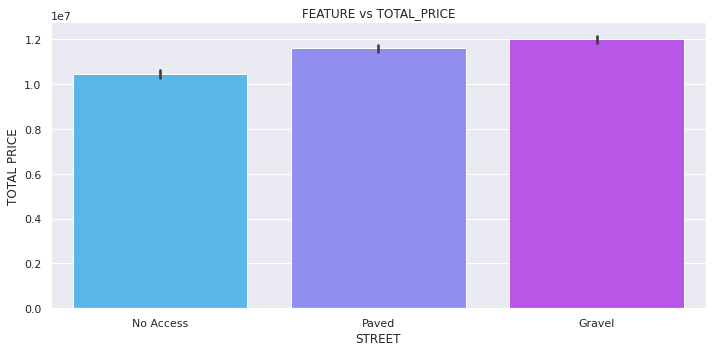

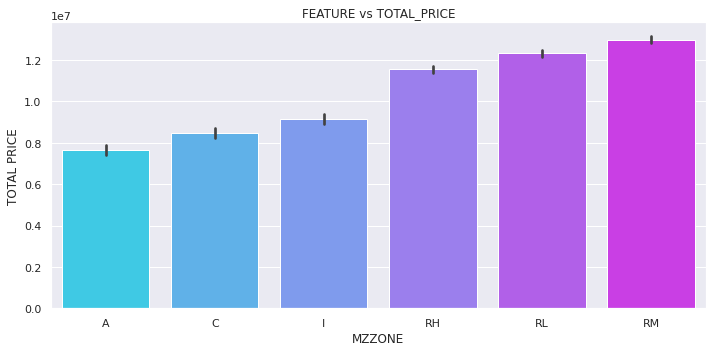

In [1145]:
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.barplot(x=feature,y="TOTAL_PRICE",data=df,palette="cool",order=df.groupby(feature)['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')[feature])
    plt.xlabel(feature)
    plt.ylabel('TOTAL PRICE')
    plt.title("FEATURE vs TOTAL_PRICE")
    plt.show()

*Summary:*

1.   All the Categorical Features having linear trend with TOTAL_PRICE



**CONTINOUS FEATURES:**

In [1146]:
 #INT_SQFT
df["INT_SQFT"].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

NO OUTLIERS PRESENT: 
 Q3 = 1744.0 |Q1 = 993.0 |IQR = 751.0


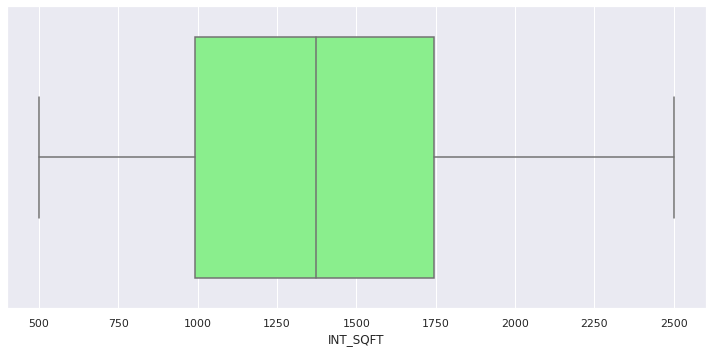

In [1147]:
#checking for outliers:
q3=df.INT_SQFT.quantile(0.75)
q1=df.INT_SQFT.quantile(0.25)
iqr=q3-q1
maximum_value=q3+(1.5*iqr)
minimum_value=q1-(1.5*iqr)
if df["INT_SQFT"].max() < maximum_value and df["INT_SQFT"].min() > minimum_value:
  print("NO OUTLIERS PRESENT: \n","Q3 =",q3,"|Q1 =",q1,"|IQR =",iqr)
else:
  print("OUTLIERS PRESENT: \n","Q3 =",q3,"|Q1 =",q1,"|IQR =",iqr)
#vizualizing outliers in box plot
sns.boxplot(x=df["INT_SQFT"],palette="jet_r")

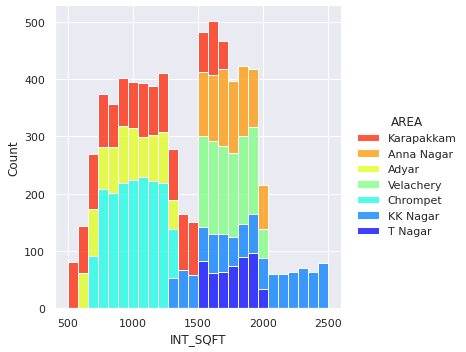

In [1148]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.autolayout"] = True
sns.displot(df,x=df["INT_SQFT"],hue=df["AREA"],multiple="stack",palette="jet_r")


*summary:*

1.   Chrompet is having more buildings with SQFT in the range 700-1300 than other areas.
2.   KK Nagar is the only area in the city having buildings more than 2000 SQFT.

1.   Adayar is having no buildings more than 1500 SQFT.
2.   Anna Nagar,Velacherry,T, Nagar is having no buildings less than 1500 SQFT.






In [1149]:
#DIST_MAINROAD
df["DIST_MAINROAD"].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

NO OUTLIERS PRESENT: 
 Q3 = 148.0 |Q1 = 50.0 |IQR = 98.0


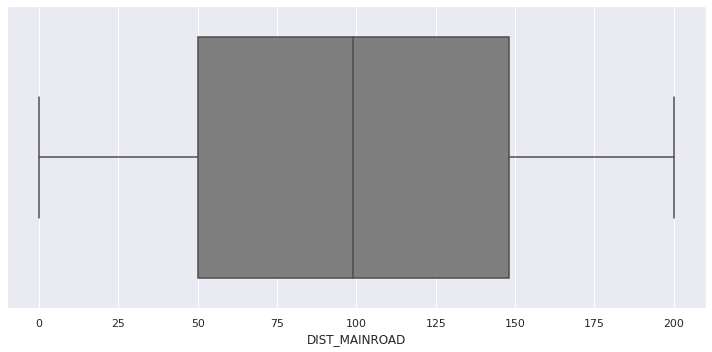

In [1150]:
q3=df.DIST_MAINROAD.quantile(0.75)
q1=df.DIST_MAINROAD.quantile(0.25)
iqr=q3-q1
maximum_value=q3+(1.5*iqr)
minimum_value=q1-(1.5*iqr)
if df["DIST_MAINROAD"].max() < maximum_value and df["DIST_MAINROAD"].min() > minimum_value:
  print("NO OUTLIERS PRESENT: \n","Q3 =",q3,"|Q1 =",q1,"|IQR =",iqr)
else:
  print("OUTLIERS PRESENT: \n","Q3 =",q3,"|Q1 =",q1,"|IQR =",iqr)
#vizualizing outliers in box plot
sns.boxplot(x=df["DIST_MAINROAD"],palette="binary")

In [1151]:
Avg_dist=df.groupby(df["AREA"])["DIST_MAINROAD"].mean()
Avg_dist

AREA
Adyar         101.332041
Anna Nagar    100.661168
Chrompet       98.133373
KK Nagar      100.700100
Karapakkam    101.028551
T Nagar       103.516966
Velachery      94.840979
Name: DIST_MAINROAD, dtype: float64

NO OUTLIERS PRESENT: 
 Q3 = 2011.0 |Q1 = 2008.0 |IQR = 3.0


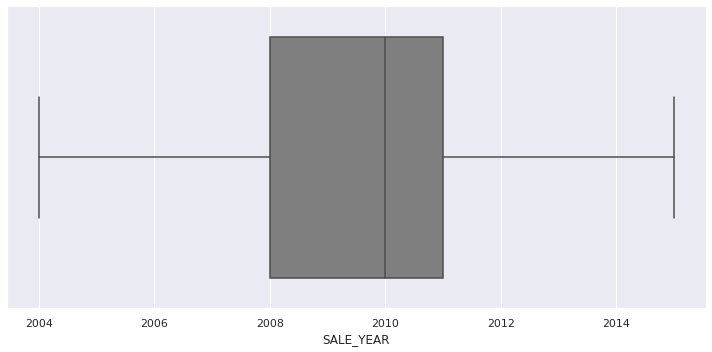

In [1152]:
#SALE_YEAR
#checking for outliers:
q3=df.SALE_YEAR.quantile(0.75)
q1=df.SALE_YEAR.quantile(0.25)
iqr=q3-q1
maximum_value=q3+(1.5*iqr)
minimum_value=q1-(1.5*iqr)
if df["SALE_YEAR"].max() < maximum_value and df["SALE_YEAR"].min() > minimum_value:
  print("NO OUTLIERS PRESENT: \n","Q3 =",q3,"|Q1 =",q1,"|IQR =",iqr)
else:
  print("OUTLIERS PRESENT: \n","Q3 =",q3,"|Q1 =",q1,"|IQR =",iqr)
#vizualizing outliers in box plot
sns.boxplot(x=df["SALE_YEAR"],palette="binary")

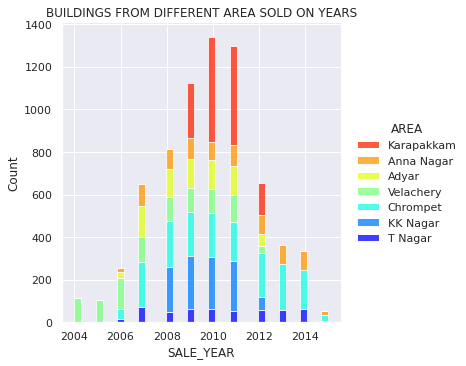

In [1153]:
sns.displot(data= df,x=df["SALE_YEAR"],hue=df["AREA"],multiple="stack",palette="jet_r")
plt.title("BUILDINGS FROM DIFFERENT AREA SOLD ON YEARS")
plt.show()

*Summary:*
1.   Before 2006 majority of the buildings were sold from Velachery.
2.   Majority of the buildings from the Karapakkam were sold Between the year 2008 - 2013.




NO OUTLIERS PRESENT: 
 Q3 = 1996.0 |Q1 = 1976.0 |IQR = 20.0


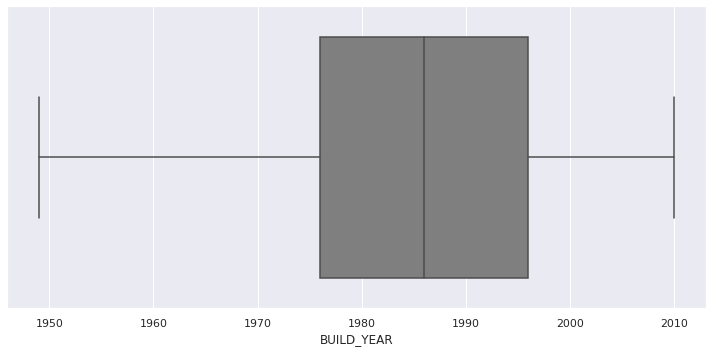

In [1154]:
#BUILD_YEAR
#checking for outliers:
q3=df.BUILD_YEAR.quantile(0.75)
q1=df.BUILD_YEAR.quantile(0.25)
iqr=q3-q1
maximum_value=q3+(1.5*iqr)
minimum_value=q1-(1.5*iqr)
if df["BUILD_YEAR"].max() < maximum_value and df["BUILD_YEAR"].min() > minimum_value:
  print("NO OUTLIERS PRESENT: \n","Q3 =",q3,"|Q1 =",q1,"|IQR =",iqr)
else:
  print("OUTLIERS PRESENT: \n","Q3 =",q3,"|Q1 =",q1,"|IQR =",iqr)
#vizualizing outliers in box plot
sns.boxplot(x=df["BUILD_YEAR"],palette="binary")

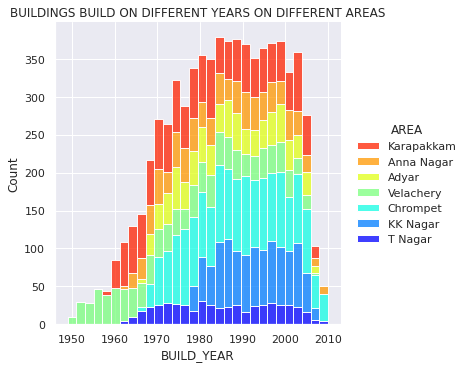

In [1155]:
sns.displot(data= df,x=df["BUILD_YEAR"],hue=df["AREA"],multiple="stack",palette="jet_r")
plt.title("BUILDINGS BUILD ON DIFFERENT YEARS ON DIFFERENT AREAS")
plt.show()

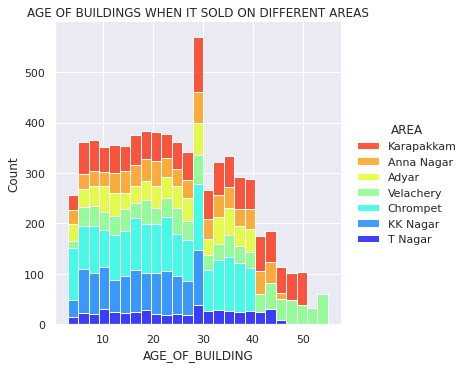

In [1156]:
#AGE_OF_BUILDING
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.autolayout"] = True
sns.displot(data= df,x=df["AGE_OF_BUILDING"],hue=df["AREA"],multiple="stack",palette="jet_r")
plt.title("AGE OF BUILDINGS WHEN IT SOLD ON DIFFERENT AREAS")
plt.show()

**CONTINOUS FEATURE RELATIONSHIP WITH TARGET VARIABLES**

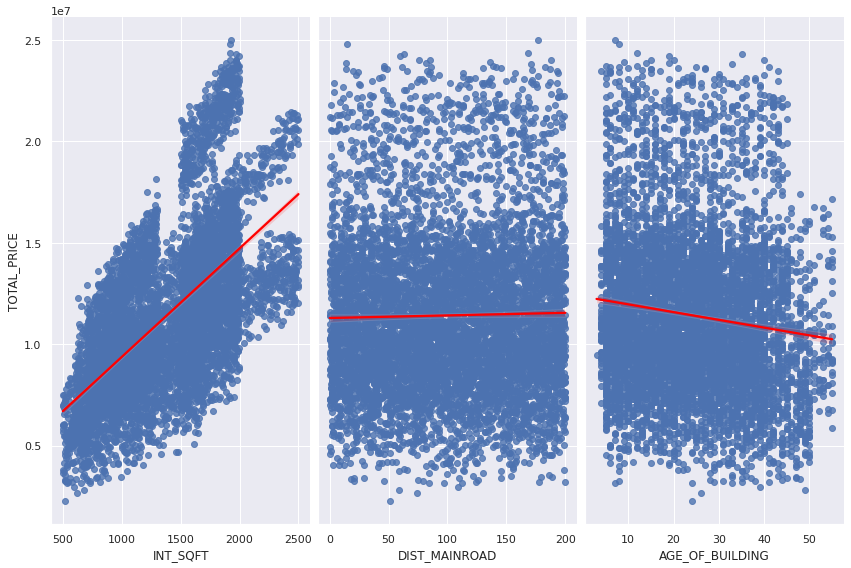

In [1157]:
sns.pairplot(df,x_vars=["INT_SQFT","DIST_MAINROAD","AGE_OF_BUILDING"], y_vars=["TOTAL_PRICE"], plot_kws={'line_kws':{'color':'red'}},height=8,aspect=.5, kind="reg",palette="hot")
plt.show()

*Summary:*
1.   From the above observation we have founD that "DIST_FEATURE" is having less impact with the target[TOTAL_PRICE].
1.   TOTAL_PRICE of the building increases with increase in INT_SQFT. 
2.    TOTAL_PRICE of the building decreases with increase in  AGE_OF_BUILDING.






SKEW value: 0.7791415794012426 
 MEAN value: 11412853.69644113


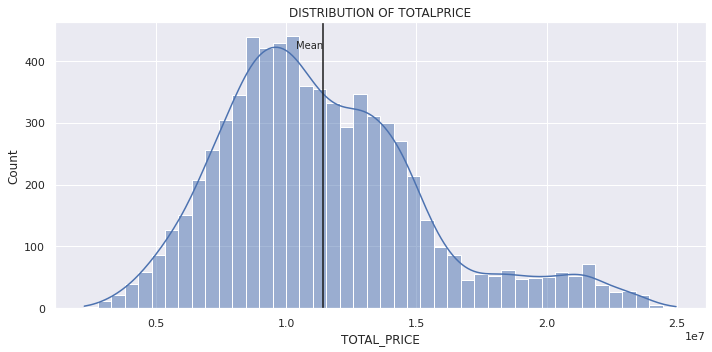

In [1158]:
sns.histplot(df['TOTAL_PRICE'],palette='cool',kde=True)
plt.axvline(x=df['TOTAL_PRICE'].mean(), color='K')
plt.text(df['TOTAL_PRICE'].mean(),420, "Mean", horizontalalignment='right')
plt.title('DISTRIBUTION OF TOTALPRICE')
print("SKEW value:",df["TOTAL_PRICE"].skew(),"\n MEAN value:",df["TOTAL_PRICE"].mean())

*Summary:*
1.   Here the target variable is normaly distributed with  right skewed.




**TRANSFORMING TO REDUCE SKEWNESS:**

SKEW value: -0.25589467240599656 
 MEAN value: 16.190832843824403


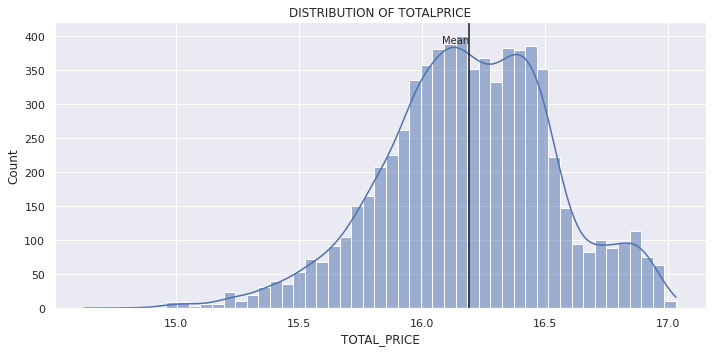

In [1159]:
df["TOTAL_PRICE"]=np.log(df["TOTAL_PRICE"])
sns.histplot(df['TOTAL_PRICE'],palette='cool',kde=True)
plt.axvline(x=df['TOTAL_PRICE'].mean(), color='K')
plt.text(df['TOTAL_PRICE'].mean(),389, "Mean", horizontalalignment='right')
plt.title('DISTRIBUTION OF TOTALPRICE')
print("SKEW value:",df["TOTAL_PRICE"].skew(),"\n MEAN value:",df["TOTAL_PRICE"].mean())

*Summary:*
1.   Skewness is reduced with transformation.



****CATEGORICAL FEATURE RELATIONSHIP WITH TARGET VARIABLES****

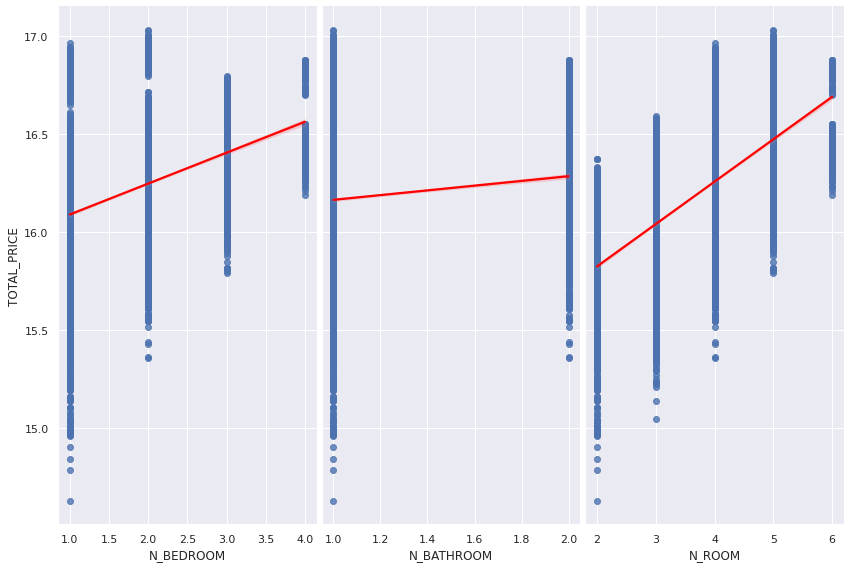

In [1160]:
sns.pairplot(df,x_vars=["N_BEDROOM","N_BATHROOM","N_ROOM"], y_vars=["TOTAL_PRICE"], plot_kws={'line_kws':{'color':'red'}},height=8,aspect=.5, kind="reg",palette="hot")
plt.show()

*Summary:*
1.   N_BEDROOM & N_ROOM is showing positive linear trend with TARGET["TOTAL_PRICE"].


**ENCODING CATEGORICAL DATA**

In [1161]:
df["AREA"] = df["AREA"].replace({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})
df["BUILDTYPE"]=df["BUILDTYPE"].replace({"House":0,"Others":1,"Commercial":2})
df["SALE_COND"] = df["SALE_COND"].replace({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"AdjLand" : 4})
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].replace({"ELO": 0, "NoSeWa": 1, "NoSewr" : 2, "AllPub": 3})
df["STREET"] = df["STREET"].replace({"No Access": 0,"Paved": 1, "Gravel": 2})
df["PARK_FACIL"]=df["PARK_FACIL"].replace({"Yes":0,"No":1})
df["MZZONE"] = df["MZZONE"].replace({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

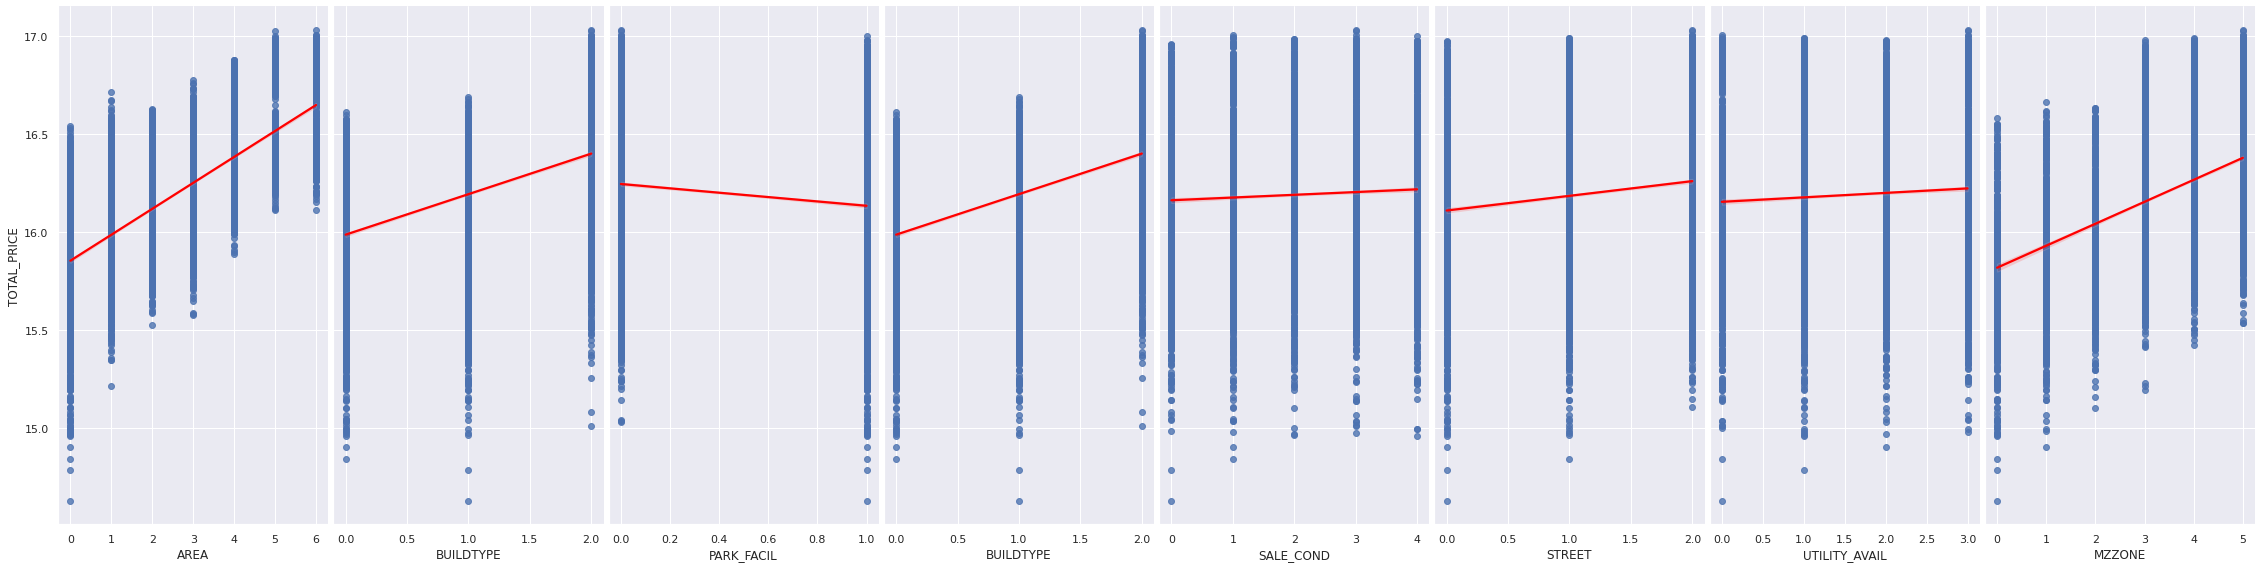

In [1162]:
sns.pairplot(df,x_vars=["AREA","BUILDTYPE","PARK_FACIL","BUILDTYPE","SALE_COND","STREET","UTILITY_AVAIL","MZZONE"], y_vars=["TOTAL_PRICE"], plot_kws={'line_kws':{'color':'red'}},height=8,aspect=.5, kind="reg",palette="hot")
plt.show()

*Summary:*
1.   AREA,BUILDTYPE_Commercial,MZZONE,BUILDTYPe has  Linear trend with TARGET
1.   SALE_COND,STREET,UTILITY_AVAIL has less linear trend with target variable["TOTAL_PRICE"].



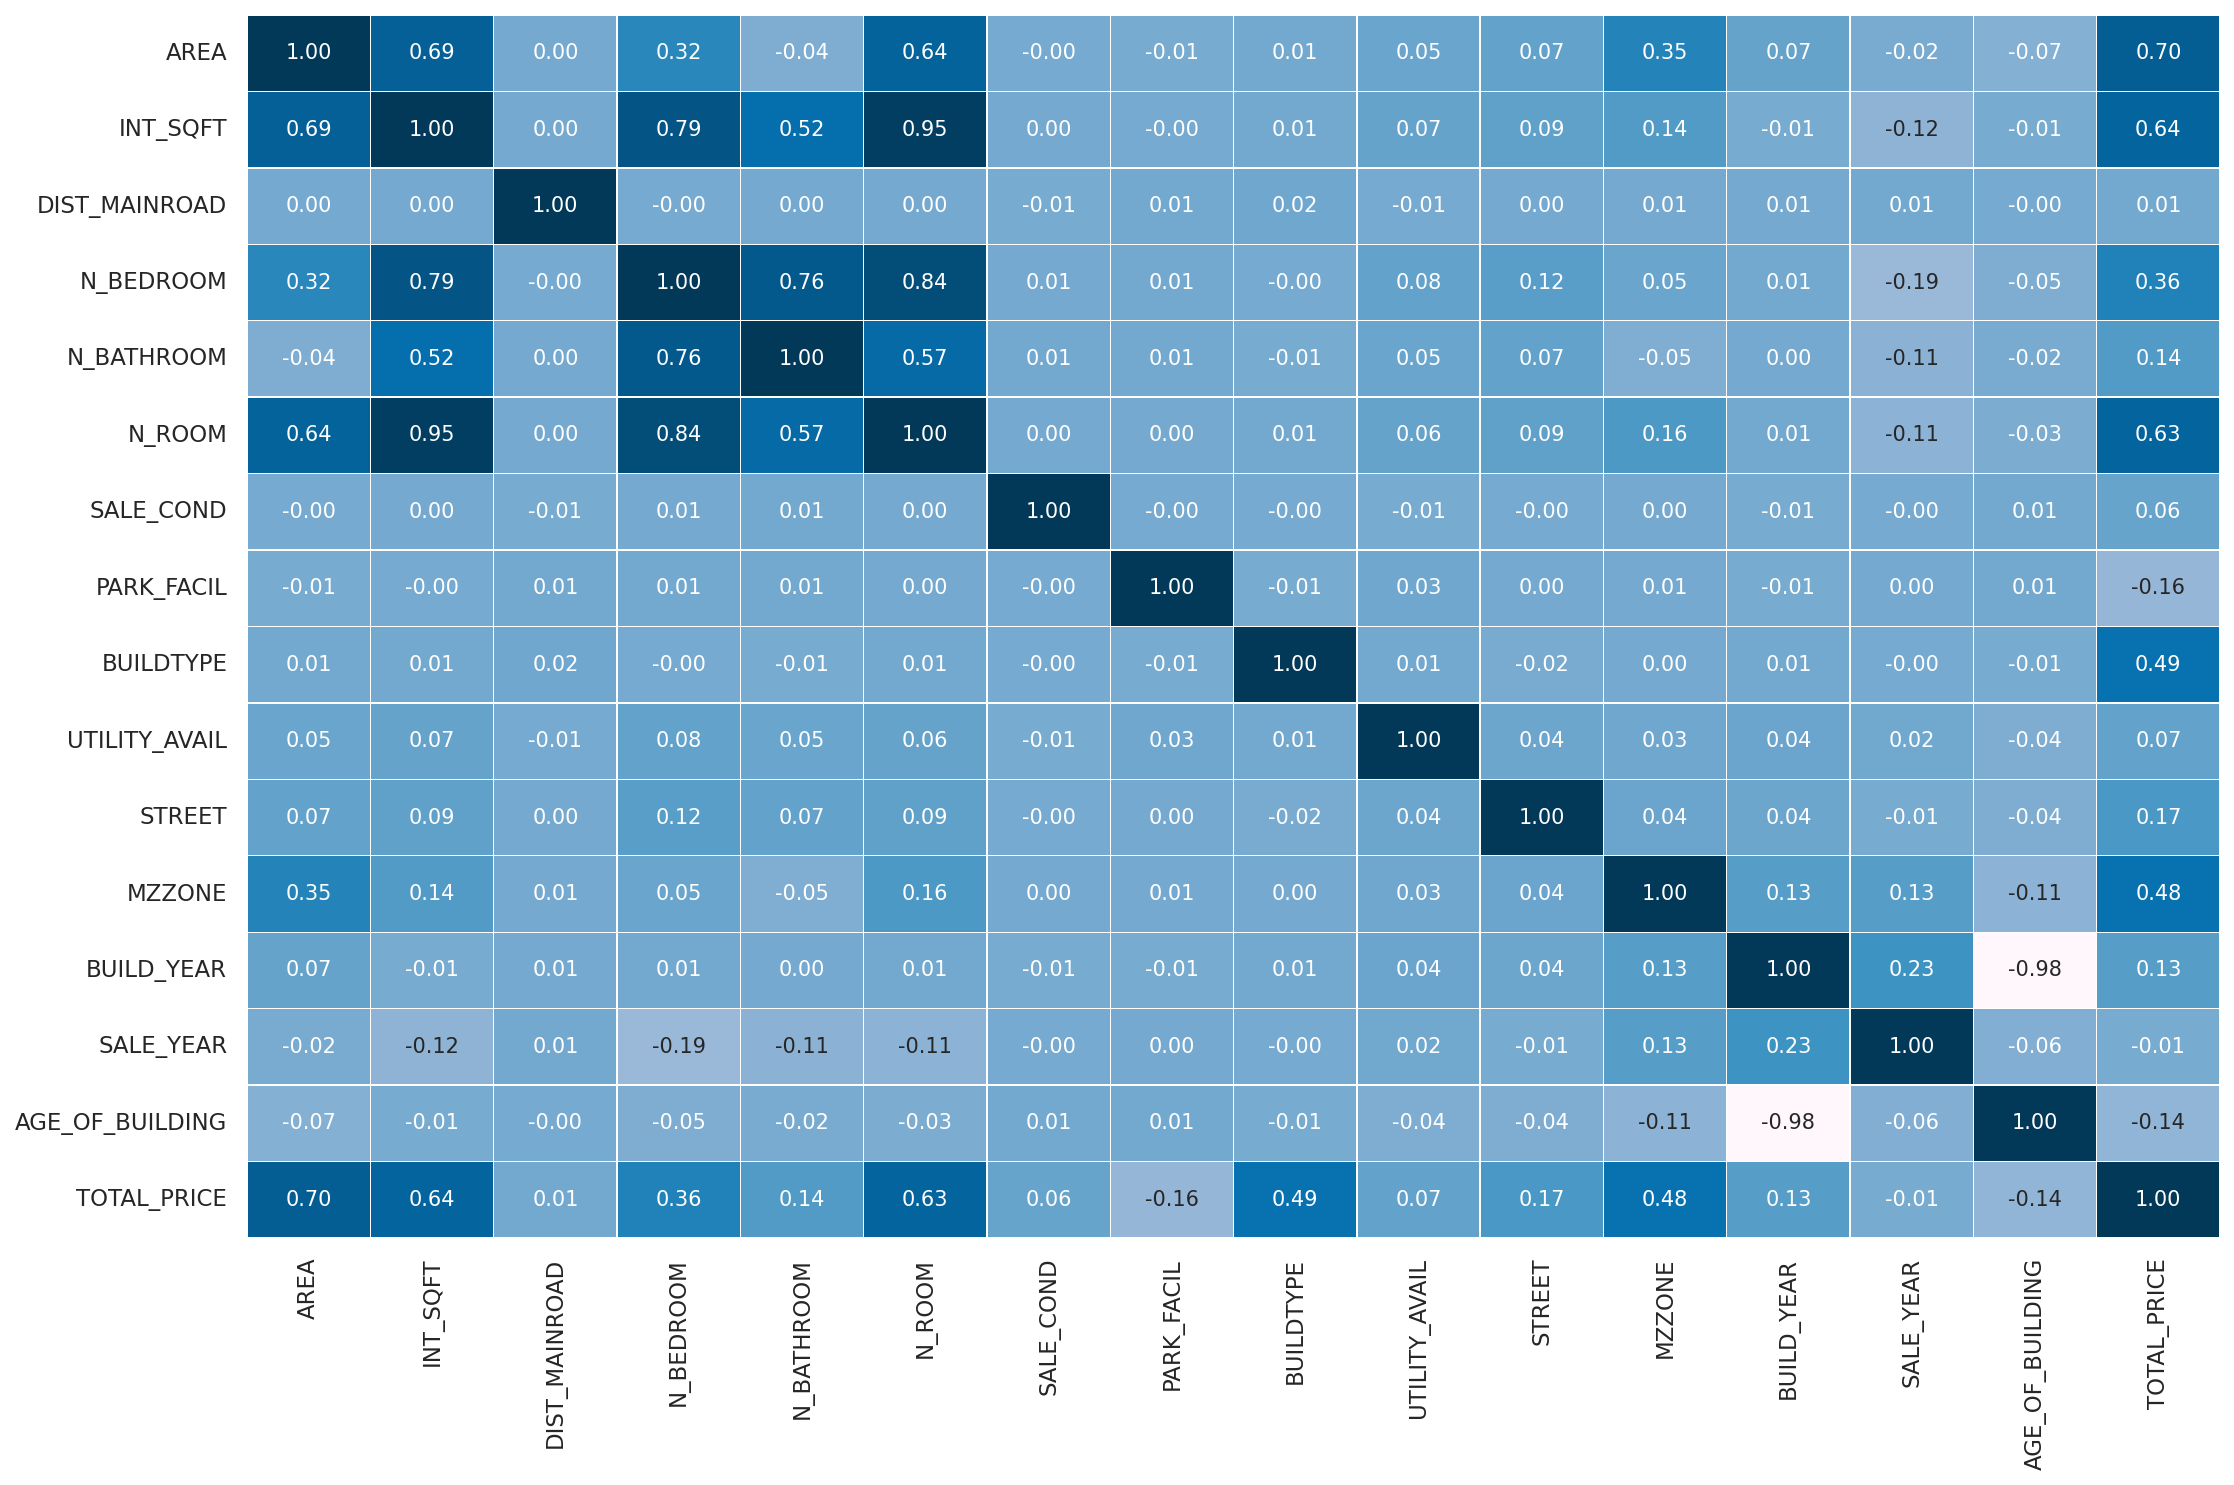

In [1163]:
plt.figure(figsize=(15,10), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.2f', linewidth=0.2, cmap='PuBu')

*Summary:*
1.   AREA,INT_SQFT,N_BEDROOM,N_ROOM,MZZONE,BUILDTYPE having positive LINEAR trend with target(TOTAL_PRICE).





#**SPLITTING THE DATASET**

In [1164]:
X=df.drop(['TOTAL_PRICE'],axis=1)#features
Y=df["TOTAL_PRICE"]#target

In [1165]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

#**MODELING THE DATA**

**LINEAR REGRESSION**

In [1166]:
#assaigning model
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
#fitting the model
linear.fit(x_train,y_train)
#predicting target values
y_pred=linear.predict(x_test)
result=pd.DataFrame({"ORIGINAL":y_test,"PREDICTED":y_pred})
print(result)
lr_score=linear.score(x_test,y_test)
print("Linear Regression Accuracy Score:",linear.score(x_test,y_test))

       ORIGINAL  PREDICTED
2839  16.082398  16.108581
820   16.509037  16.590392
4153  16.295258  16.457163
2809  16.235177  16.336596
555   15.880190  15.840196
...         ...        ...
2506  16.346776  16.340652
6429  16.040231  15.838928
3390  16.710179  16.757190
6035  16.014789  15.872033
1986  15.813805  15.703388

[2133 rows x 2 columns]
Linear Regression Accuracy Score: 0.9071512102571113


**K NEAREST NEIGHBOUR**

In [1167]:
#scaling is mandatory for KNN
scaler = StandardScaler() 
scaler.fit(x_train) 
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [1168]:
from sklearn.neighbors import KNeighborsRegressor #here the target is continous
from sklearn import metrics
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,75,100]:
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train,y_train) 
  '''Finding values from different no of neighbours.
  Here the target is continous so we use R2score for validation'''
  print("K value  : " , i, " score : ", metrics.r2_score(y_test,y_pred))



K value  :  1  score :  0.9071512102571113
K value  :  2  score :  0.9071512102571113
K value  :  3  score :  0.9071512102571113
K value  :  4  score :  0.9071512102571113
K value  :  5  score :  0.9071512102571113
K value  :  6  score :  0.9071512102571113
K value  :  7  score :  0.9071512102571113
K value  :  8  score :  0.9071512102571113
K value  :  9  score :  0.9071512102571113
K value  :  10  score :  0.9071512102571113
K value  :  20  score :  0.9071512102571113
K value  :  30  score :  0.9071512102571113
K value  :  40  score :  0.9071512102571113
K value  :  50  score :  0.9071512102571113
K value  :  75  score :  0.9071512102571113
K value  :  100  score :  0.9071512102571113


*Summary:*

1.   Almost all k value gives same R2score.


In [1169]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)
result_KNN= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})
result_KNN

,Actual,Predicted
2839,16.082398,16.156240
820,16.509037,16.440378
4153,16.295258,16.422018
2809,16.235177,16.168544
555,15.880190,15.653062
...,...,...
2506,16.346776,16.244731
6429,16.040231,15.918159
3390,16.710179,16.647996
6035,16.014789,15.987866


In [1170]:
# Validating the model
from sklearn import metrics
KNN_score= metrics.r2_score(y_test,y_pred_KNN)
print('R2 SCORE FOR MODEL["Knn"]:',KNN_score)

R2 SCORE FOR MODEL["Knn"]: 0.8781441478598203


**DECISION TREE**

In [1171]:
#Scaling is mandatory
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [1172]:
from sklearn.utils import validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,75,100]:
  d_tree = DecisionTreeRegressor(max_depth=depth)
  d_tree.fit(x_train, y_train)
  validation = cross_val_score(d_tree, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH: ",depth,"R2-Score: ",np.mean(validation))

DEPTH:  1 R2-Score:  0.3432092731145437
DEPTH:  2 R2-Score:  0.6050184996610704
DEPTH:  3 R2-Score:  0.7346925345559876
DEPTH:  4 R2-Score:  0.8218152462296315
DEPTH:  5 R2-Score:  0.8838319707600022
DEPTH:  6 R2-Score:  0.9086741618441158
DEPTH:  7 R2-Score:  0.9258483813577556
DEPTH:  8 R2-Score:  0.9405171203932261
DEPTH:  9 R2-Score:  0.9472663556909536
DEPTH:  10 R2-Score:  0.9494222849559529
DEPTH:  20 R2-Score:  0.9495731383369564
DEPTH:  30 R2-Score:  0.9487276843065391
DEPTH:  40 R2-Score:  0.9502003842315971
DEPTH:  50 R2-Score:  0.9490107826773748
DEPTH:  75 R2-Score:  0.9508123357207474
DEPTH:  100 R2-Score:  0.9502105497748886


*Summary:*
1.   Upto depth 10 cross val score increases then gradually falling.



In [1173]:
#modelling with depth =10
d_tree = DecisionTreeRegressor(max_depth=10)
d_tree.fit(x_train, y_train)
y_pred_d_tree = d_tree.predict(x_test)
result_d_tree=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_d_tree})
result_d_tree

,Actual,Predicted
2839,16.082398,16.043337
820,16.509037,16.533732
4153,16.295258,16.315211
2809,16.235177,16.212839
555,15.880190,15.755420
...,...,...
2506,16.346776,16.337732
6429,16.040231,15.968271
3390,16.710179,16.681581
6035,16.014789,15.969691


In [1174]:
#validation
d_tree_score = metrics.r2_score(y_test,y_pred_d_tree)
print('R2 SCORE FOR MODEL["DECISION TREE"]:',d_tree_score)

R2 SCORE FOR MODEL["DECISION TREE"]: 0.9441778382519654


**RANDOM FOREST**

In [1175]:
from sklearn.ensemble import RandomForestRegressor
ran_fo = RandomForestRegressor(n_estimators= 100, max_depth = 10, max_features='sqrt')
ran_fo.fit(x_train, y_train)
y_pred_ran_fo = ran_fo.predict(x_test)
result_ran_fo= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ran_fo})
result_ran_fo

,Actual,Predicted
2839,16.082398,16.038510
820,16.509037,16.459718
4153,16.295258,16.307453
2809,16.235177,16.248473
555,15.880190,15.871738
...,...,...
2506,16.346776,16.302020
6429,16.040231,15.994665
3390,16.710179,16.686379
6035,16.014789,16.037936


In [1176]:
#Validation
ran_fo_score = metrics.r2_score(y_test,y_pred_ran_fo)
print('R2 SCORE FOR MODEL["RANDOM FOREST"]:',ran_fo_score)

R2 SCORE FOR MODEL["RANDOM FOREST"]: 0.9505235769370702


**XG_BOOST**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.25,0.5,0.75,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train)))


Learning rate :  0.01  Train score :  -266.3653721609834  Cross-Val score :  -267.64342432827283
Learning rate :  0.02  Train score :  -34.313453369874495  Cross-Val score :  -34.5111627410562
Learning rate :  0.03  Train score :  -3.631936490586022  Cross-Val score :  -3.6693772526262243
Learning rate :  0.04  Train score :  0.36489730861351577  Cross-Val score :  0.35352717541050127
Learning rate :  0.05  Train score :  0.8859292983815467  Cross-Val score :  0.8790960411674439
Learning rate :  0.1  Train score :  0.9872828444270826  Cross-Val score :  0.9845570097450208
Learning rate :  0.11  Train score :  0.9897774663256783  Cross-Val score :  0.9863385568990928
Learning rate :  0.12  Train score :  0.9905861652264923  Cross-Val score :  0.9880220847622146
Learning rate :  0.13  Train score :  0.9919810258553959  Cross-Val score :  0.9895849087826868
Learning rate :  0.14  Train score :  0.992830678565006  Cross-Val score :  0.9902625950067989
Learning rate :  0.15  Train score :  

In [ ]:
xg_model = xgb.XGBRegressor(learning_rate = 0.2, n_estimators=100, verbosity = 0)
xg_model.fit(x_train,y_train) 
xg_model.score(x_test, y_test)

In [ ]:
y_pred_XGB=model.predict(x_test)

In [ ]:
XGB_SCORE = metrics.r2_score(y_test,y_pred_XGB)
print('R2 SCORE FOR  MODEL["XG_BOOST"]:',XGB_SCORE)

In [ ]:
sns.scatterplot(x= y_test, y=y_pred_XGB, color=["B"])
plt.title("prediction result vs actual result")
plt.show()

In [ ]:
result_XGB= pd.DataFrame({"Actual":np.exp(y_test), "Predicted": np.exp(y_pred_XGB)})
result_XGB

*Summary:*
With XGB predicted result were close to the Actual with 99.5% accuracy.

**FINDING OUT BEST MODEL AMONG THEM**

In [ ]:
r2_score={'MODEL':['LR','KNN','D_TREE','RANDOM_FOREST',"XG_BOOST"],"SCORE":[lr_score,KNN_score,d_tree_score,ran_fo_score,XGB_SCORE]}
print(pd.DataFrame(r2_score))


*Summary:*
XGBOOST is having maximum Score.

In [ ]:
coefficients = pd.DataFrame(model.feature_importances_,X.columns)
coefficients.columns = ['coefficients']
coefficients

**Area,N_ROOM & Type of buildings plays a vital role in the price of buildings**